Last update: 4 September 2022

# Everyone Can Learn Python Scholarship

## Introductory Note
This was the first "Everyone Can Learn Python" Scholarship challenge hosted by DataCamp. The challenges tested introductory Python and SQL coding skills along with problem-solving and creative thinking.

I have a data science degree and am actively working as a data scientist, which meant that I was ineligible to participate in the competition. Specifically, it was only open to people who had completed or were completing their secondary education and were preparing to pursue a degree in computer science or data science, or people preparing for graduate-level computer science or data science degrees.

However, I am always interested in new coding/analysis challenges, which is why I completed a response and added it to my GitHub portfolio without ever intending to submit it.

## Part 1 - Carbon Dioxide (CO2) Emissions
**Coding language: Python**

### Background
A colleague at a public policy advocacy organisation in Canada has requested help with drafting CO2 emissions rules guidelines. After researching the emissions of a wide range of Canadian vehicles, she would like to know which vehicles produce lower emissions.

### Data
The data provided consisted of seven years of Canadian vehicle emissions data sourced from the Government of Canada's open data website. There were 7,385 observations and nine different variables:

- "Make" - The company that manufactures the vehicle.
- "Model" - The vehicle's model.
- "Vehicle Class" - Vehicle class by utility, capacity, and weight.
- "Engine Size(L)" - The engine's displacement in liters.
- "Cylinders" - The number of cylinders.
- "Transmission" - The transmission type: A = Automatic, AM = Automatic Manual, AS = Automatic with select shift, AV = Continuously variable, M = Manual, 3 - 10 = the number of gears.
- "Fuel Type" - The fuel type: X = Regular gasoline, Z = Premium gasoline, D = Diesel, E = Ethanol (E85), N = natural gas.
- "Fuel Consumption Comb (L/100 km)" - Combined city/highway (55%/45%) fuel consumption in liters per 100 km (L/100 km).
- "CO2 Emissions (g/km)" - The tailpipe carbon dioxide emissions in grams per kilometer for combined city and highway driving. 

After taking a look at the website from which the dataset was sourced, it was noted that for the 2022 fuel consumption ratings dataset at least, there were five additional variables:
- "Model Year" - The year of vehicle manufacture.
- "Fuel Consumption City (L/100 km)" - City fuel consumption in litres per 100 km (L/100 km).
- "Fuel Consumption Hwy (L/100 km)" - Highway fuel consumption in litres per 100 km (L/100 km).
- "Fuel Consumption Comb (mpg)" - Combined city/highway (55%/45%) fuel consumption in miles per gallon (mpg).
- "CO2 Rating" - A vehicle's tailpipe emissions of CO2 pollutants rated on a scale from 1 (worst) to 10 (best).
- "Smog Rating" - A vehicle's tailpipe emissions of smog-forming pollutants rated on a scale from 1 (worst) to 10 (best).

### Summary
1. The median engine size is 3 litres.
2. Ethanol had the largest average combined fuel consumption rate (16.86 L/100 km) and diesel had the lowest (8.84 L/100 km).
3. The average fuel consumption rates of natural gas, premium gasoline and regular gasoline were very similar, and ranged from 10.19 L/100km to 12.70 L/100km.
4. The linear correlation between combined fuel consumption and CO2 emissions was 0.92, which indicated a very strong positive relationship between the two variables.
5. Mid-sized vehicle classes had smaller average CO2 emissions than small SUVs, despite presenting a wider range of values.
6. The average overall CO2 emissions for all vehicles was 250.58 g/km.
7. The average CO2 emissions for vehicles with an engine size of 2 litres or smaller was 198.27 g/km. 
8. Several different data visualisations were used to determine the relationship between variables in the dataset and CO2 emissions. They largely agreed that larger and heavier vehicles (including larger engines, more cylinders and more gears) produced more CO2 emissions on average.
9. There was also some evidence that automatic transmission vehicles produced more emissions, and continuously variable transmission vehicles produced the least, with manual transmission vehicles sitting somewhere in the middle.

### Detailed Findings

In [1]:
# package import
import matplotlib.pyplot as plt
import pandas as pd
import regex as re
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder

In [2]:
# load the data
cars = pd.read_csv('data/co2_emissions_canada.csv')

In [3]:
# view preliminary stats
cars.info()
print("-----")
cars.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 8   CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 519.4+ KB
-----


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.4,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.9,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,10.3,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,9.9,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Z,10.7,248


In [4]:
print("Summary statistics for numeric columns")
cars.describe()

Summary statistics for numeric columns


,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,10.975071,250.584699
std,1.354170,1.828307,2.892506,58.512679
min,0.900000,3.000000,4.100000,96.000000
25%,2.000000,4.000000,8.900000,208.000000
50%,3.000000,6.000000,10.600000,246.000000
75%,3.700000,6.000000,12.600000,288.000000
max,8.400000,16.000000,26.100000,522.000000


In [5]:
print("Summary statistics for categorical columns")
cars.describe(include = 'O')

Summary statistics for categorical columns


,Make,Model,Vehicle Class,Transmission,Fuel Type
count,7385,7385,7385,7385,7385
unique,42,2053,16,27,5
top,FORD,F-150 FFV 4X4,SUV - SMALL,AS6,X
freq,628,32,1217,1324,3637


From the initial exploration we can see that there are no immediately obvious missing values in the dataset, but there is very high cardinality in the *Make* and *Model* variables (high numbers of unique values), which could make any meaningful analysis incorporating them difficult.

In [6]:
# rename selected columns
cars.rename(columns = {'Vehicle Class': 'Class',
                       'Engine Size(L)': 'EngineSize',
                       'Fuel Type': 'FuelType',
                       'Fuel Consumption Comb (L/100 km)': 'FuelConsump',
                       'CO2 Emissions(g/km)': 'CO2'}, inplace = True)

In [7]:
# add a couple of additional variables that might help with insights etc
cars['MakeModel'] = cars.Make + "-" + cars.Model

cars['TransmissionGears'] = cars['Transmission'].str.findall(r"\d+").apply(''.join)
cars['TransmissionGears'] = cars['TransmissionGears'].replace("", 0).astype(int)
cars['TransmissionGearsCat'] = cars.TransmissionGears.astype('str')
cars['TransmissionType'] = cars['Transmission'].str.findall(r"[A-Z]").apply(''.join)

col = []
col2 = []
for i, row in cars.iterrows():
    e = row['EngineSize']
    if e > 0 and e < 1:
        c = "Less than 1"
        c2 = 0.5
    elif e >= 1 and e < 2:
        c = "1 - 2"
        c2 = 1.5
    elif e >= 2 and e < 3:
        c = "2 - 3"
        c2 = 2.5
    elif e >= 3 and e < 4:
        c = "3 - 4"
        c2 = 3.5
    elif e >= 4 and e < 5:
        c = "4 - 5"
        c2 = 4.5
    elif e >= 5 and e < 6:
        c = "5 - 6"
        c2 = 5.5
    elif e >= 6 and e < 7:
        c = "6 - 7"
        c2 = 6.5
    elif e >= 7 and e < 8:
        c = "7 - 8"
        c2 = 7.5
    elif e >= 8:
        c = "8 or more"
        c2 = 8.5
    col.append(c)
    col2.append(c2)

cars['EngineSizeCat'] = col
cars['EngineSize2'] = col2
cars['CylindersCat'] = cars.Cylinders.astype('str')

In [8]:
print("The median engine size is: " + (cars.EngineSize.median()).astype(str) + " Litres.")

The median engine size is: 3.0 Litres.


In [9]:
print("Average fuel consumption for different fuel types: ")
round(cars.groupby('FuelType', as_index = False)['FuelConsump'].mean(), 4).sort_values(
    by = "FuelConsump", ascending = False).rename(columns = {'FuelType': 'Fuel Type', 'FuelConsump': 'Fuel Consumption (L/100 km)'})

Average fuel consumption for different fuel types: 


,Fuel Type,Fuel Consumption (L/100 km)
1,E,16.8614
2,N,12.7000
4,Z,11.4228
3,X,10.0846
0,D,8.8354


The table above indicates that ethanol (E85) had by far the largest average fuel consumption and diesel the lowest. Furthermore, the average fuel consumption rates of natural gas, premium gasoline and regular gasoline were very similar.

#### **CO2 emissions against fuel consumption**

In [10]:
print("The overall correlation between fuel consumption and CO2 emissions is: " + round(cars['FuelConsump'].corr(cars.CO2), 4).astype(str))

The overall correlation between fuel consumption and CO2 emissions is: 0.9181


A correlation coefficient measures the strength and direction of the (typically) linear relationship between two quantitative variables. It this case, it indicates a very strong positive overall relationship between fuel consumption and CO2 emissions.

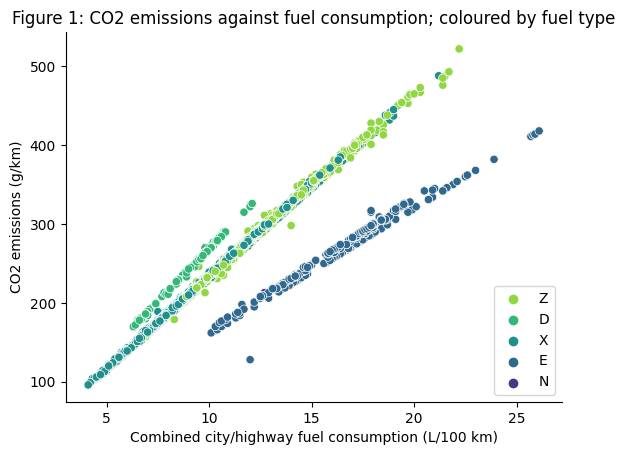

In [11]:
g = sns.scatterplot(x = "FuelConsump", y = "CO2", hue = "FuelType", data = cars, palette="viridis_r")
plt.title("Figure 1: CO2 emissions against fuel consumption; coloured by fuel type")
plt.xlabel("Combined city/highway fuel consumption (L/100 km)")
plt.ylabel("CO2 emissions (g/km)")
sns.despine(right = True, top = True)

plt.legend(loc = 4);
#labels = ['Premium gasoline', 'Diesel', 'Regular gasoline', 'Ethanol', 'Natural gas']

In [12]:
#cars.loc[(cars['FuelConsump'] > 10) & (cars['FuelConsump'] < 15) & (cars.CO2 < 200), ]

- The three clusters in the chart of combined fuel consumption against CO2 emissions appeared to correspond best to the type of vehicle fuel, with premium gasoline and regular gasoline forming the central cluster, diesel on the left, and ethanol and the lone natural gas vehicle on the right. In terms of the current problem, this can be interpretated as indicating that for a particular combined fuel consumption level, ethanol and natural gas-fuelled vehicles produce the lowest emissions, and diesel-fuelled vehicles produce slightly more emissions than a gasoline-fuelled vehicle.
- The outlying data point in the latter cluster was a Mercedes-Benz GLA 250 4MATIC small SUV. It reported a combined fuel consumption of 12 litres per 100 km and CO2 emissions of 128 g/km.

In terms of the other variables:
- Heavier vehicles (as proxied by vehicle class), larger engine sizes, appeared to consume more fuel and produce more emissions.
- In terms of the other variables, heavier vehicles (as proxied by vehicle class), larger engine sizes and more cylinders appeared to consistently consume more fuel and produce more emissions irrespective of fuel type. There appeared to be no similar relationship for vehicle model, class and transmission type or transmission gears.

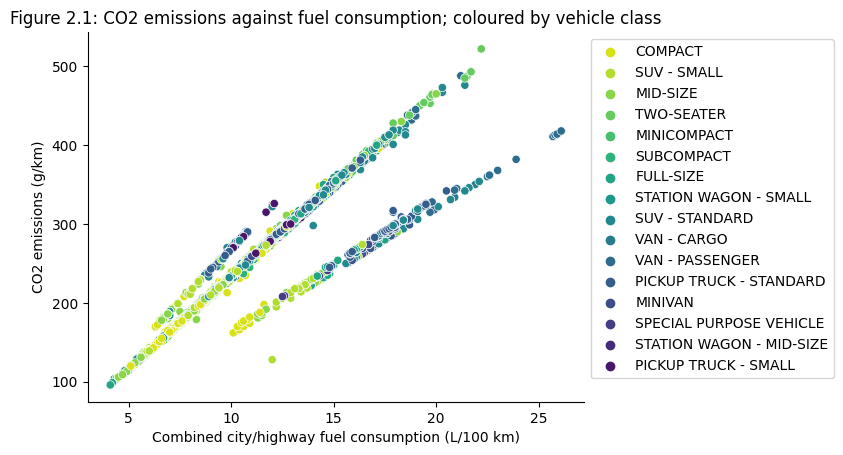

In [13]:
g = sns.scatterplot(x = "FuelConsump", y = "CO2", hue = "Class", data = cars, palette="viridis_r")
plt.title("Figure 2.1: CO2 emissions against fuel consumption; coloured by vehicle class")
plt.xlabel("Combined city/highway fuel consumption (L/100 km)")
plt.ylabel("CO2 emissions (g/km)")
sns.despine(right = True, top = True)

plt.legend(loc = 2, bbox_to_anchor = (1,1));

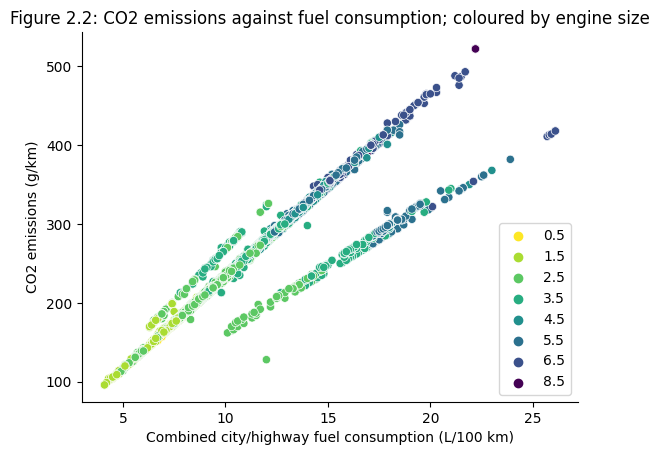

In [14]:
g = sns.scatterplot(x = "FuelConsump", y = "CO2", hue = "EngineSize2", data = cars, legend = "full", palette="viridis_r")
plt.title("Figure 2.2: CO2 emissions against fuel consumption; coloured by engine size")
plt.xlabel("Combined city/highway fuel consumption (L/100 km)")
plt.ylabel("CO2 emissions (g/km)")
sns.despine(right = True, top = True)

plt.legend(loc = 4);

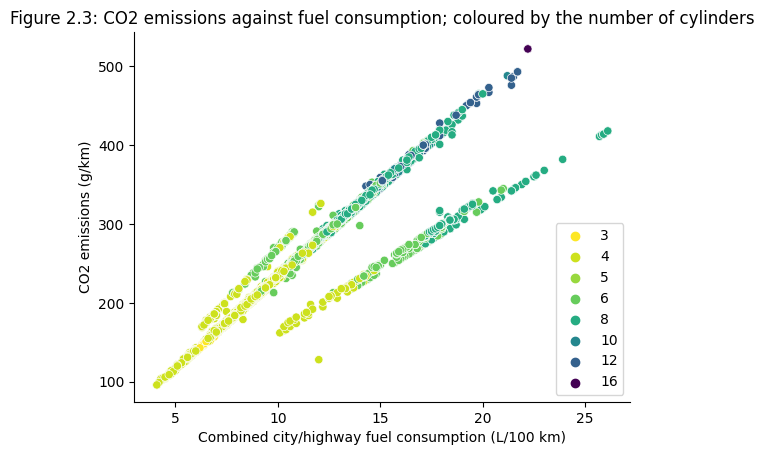

In [15]:
g = sns.scatterplot(x = "FuelConsump", y = "CO2", hue = "Cylinders", data = cars, legend = "full", palette="viridis_r")
plt.title("Figure 2.3: CO2 emissions against fuel consumption; coloured by the number of cylinders")
plt.xlabel("Combined city/highway fuel consumption (L/100 km)")
plt.ylabel("CO2 emissions (g/km)")
sns.despine(right = True, top = True)

plt.legend(loc = 4);

#### **SUV-SMALL versus MID-SIZE vehicles**

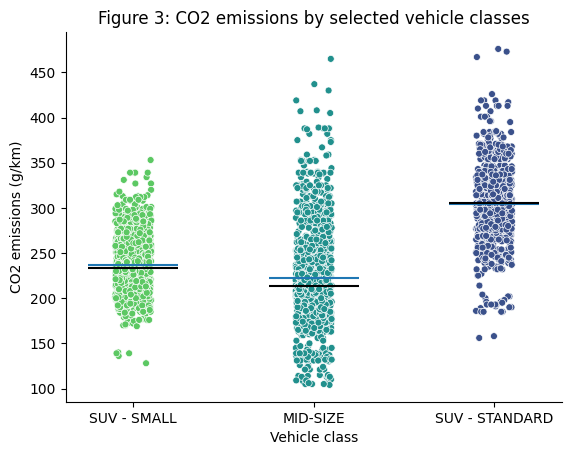

In [16]:
class_cars = cars.loc[(cars.Class == 'SUV - SMALL') | (cars.Class == 'MID-SIZE') | (cars.Class == 'SUV - STANDARD')]

g = sns.stripplot(x = "Class", y = "CO2", data = class_cars, palette = "viridis_r", linewidth = 0.5, edgecolor = "white")
plt.title("Figure 3: CO2 emissions by selected vehicle classes")
plt.xlabel("Vehicle class")
plt.ylabel("CO2 emissions (g/km)")
sns.despine(right = True, top = True)

class_mean = class_cars.groupby('Class', sort = False)['CO2'].mean()
_ = [g.hlines(y, i-.25, i+.25, zorder=3) for i, y in class_mean.reset_index()['CO2'].items()]

class_median = class_cars.groupby('Class', sort = False)['CO2'].median()
_ = [g.hlines(y, i-.25, i+.25, zorder=3, colors = "black") for i, y in class_median.reset_index()['CO2'].items()]

Figure 3 shows the distribution of CO2 emissions for small SUV, mid-sized and standard SUV vehicles. It shows that despite mid-sized vehicles having a wider range of CO2 emissions, its average (blue) and median (black) emissions are lower than those for a small SUV.

In [17]:
print("The average overall CO2 emissions for all vehicles is: " + round(cars.CO2.mean(), 2).astype(str) + " g/km.")
cars_engine = cars.loc[cars.EngineSize <= 2]['CO2'].mean()
print("The average overall CO2 emissions for vehicles with an engine size of 2 litres or smaller is: " + round(cars_engine, 2).astype(str) + " g/km.")

The average overall CO2 emissions for all vehicles is: 250.58 g/km.
The average overall CO2 emissions for vehicles with an engine size of 2 litres or smaller is: 198.27 g/km.


#### **Other Insights**

In [20]:
# create a function to do the plotting
def plot_emissions_by_var(var, figheight):
    cars_agg = cars.groupby(var).agg({'CO2': ['mean', 'median']}).reset_index()
    cars_agg.columns = [var, 'AvgCO2', 'MedCO2']

    cars_var = cars.merge(cars_agg, how = 'left', on = var)
    cars_var.sort_values(by = ['MedCO2'], ascending = False, inplace = True)

    fig = plt.subplots(figsize = (8,figheight))

    g = sns.stripplot(x = "CO2", y = var, data = cars_var, palette="viridis", linewidth = 0.5, edgecolor = "white")
    plt.xlabel("CO2 emissions (g/km)")
    sns.despine(right = True, top = True)

    co2_mean = cars_var.groupby(var, sort = False)['CO2'].mean()
    _ = [g.vlines(y, i-.25, i+.25, zorder = 3) for i, y in co2_mean.reset_index()['CO2'].items()]

    co2_median = cars_var.groupby(var, sort = False)['CO2'].median()
    _ = [g.vlines(y, i-.25, i+.25, zorder = 3, colors = "black") for i, y in co2_median.reset_index()['CO2'].items()]

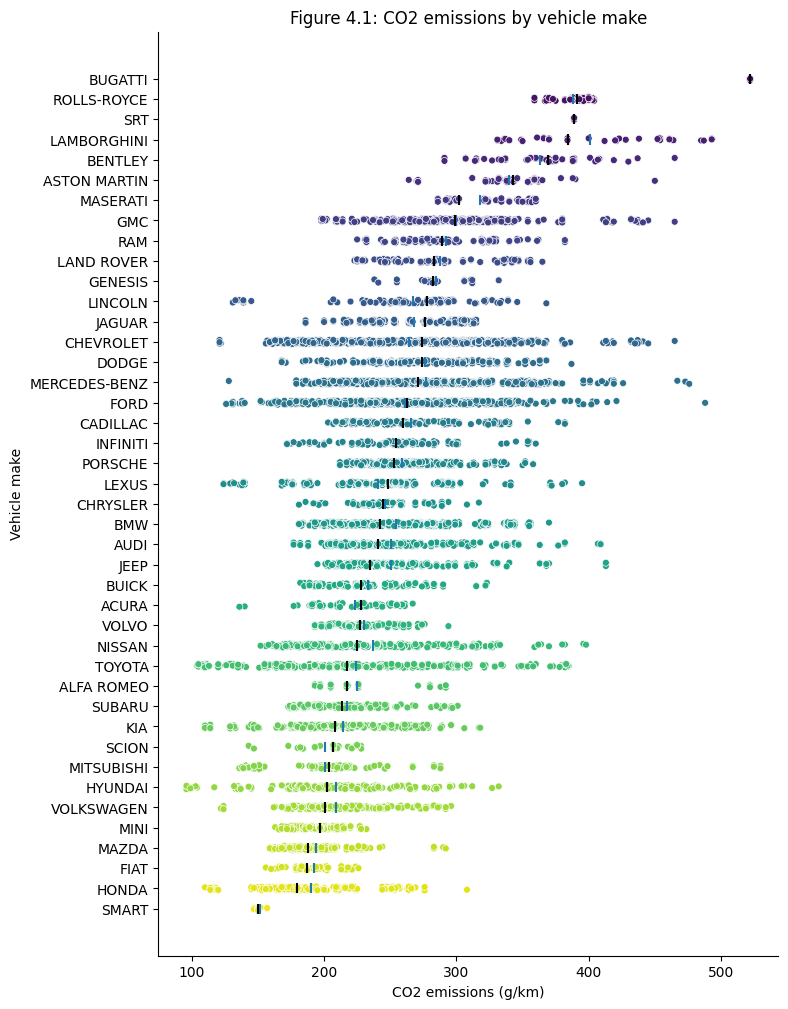

In [25]:
plot_emissions_by_var("Make", figheight = 12)
plt.title("Figure 4.1: CO2 emissions by vehicle make")
plt.ylabel("Vehicle make");

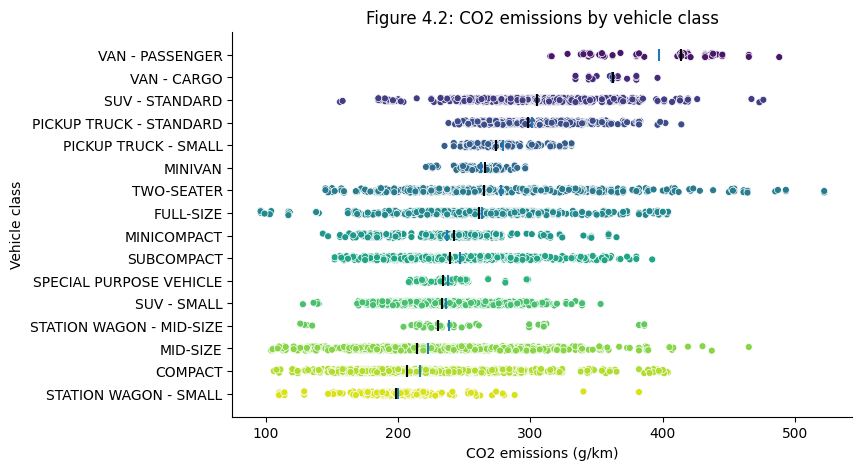

In [26]:
plot_emissions_by_var("Class", figheight = 5)
plt.title("Figure 4.2: CO2 emissions by vehicle class")
plt.ylabel("Vehicle class");

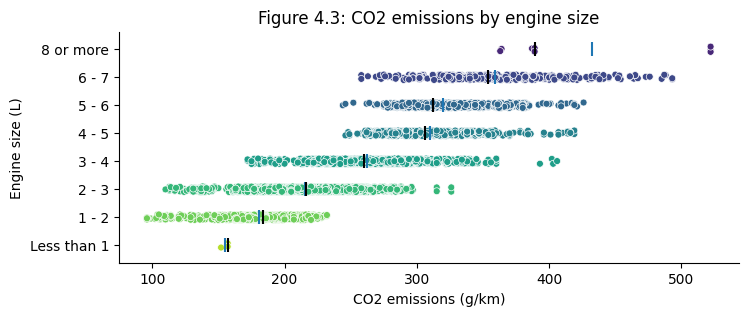

In [69]:
plot_emissions_by_var("EngineSizeCat", figheight = 3)
plt.title("Figure 4.3: CO2 emissions by engine size")
plt.ylabel("Engine size (L)");

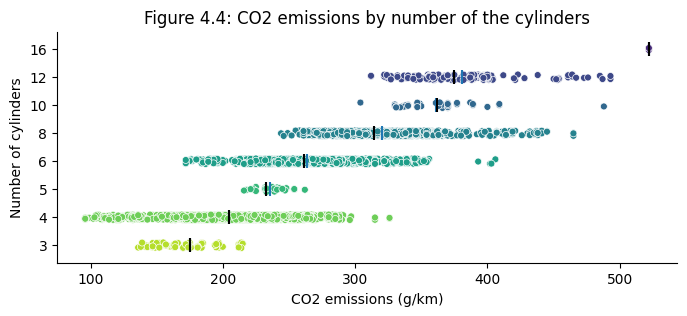

In [70]:
plot_emissions_by_var("CylindersCat", figheight = 3)
plt.title("Figure 4.4: CO2 emissions by number of the cylinders")
plt.ylabel("Number of cylinders");

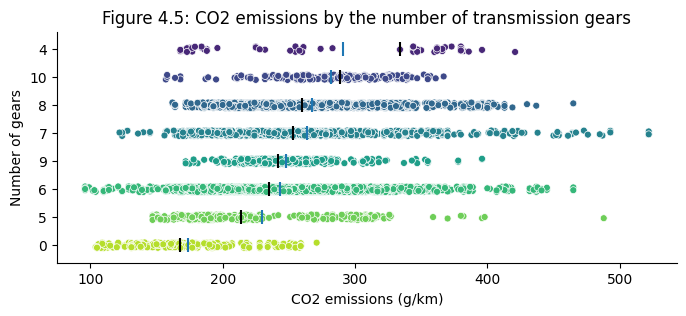

In [29]:
plot_emissions_by_var("TransmissionGearsCat", figheight = 3)
plt.title("Figure 4.5: CO2 emissions by the number of transmission gears")
plt.ylabel("Number of gears");

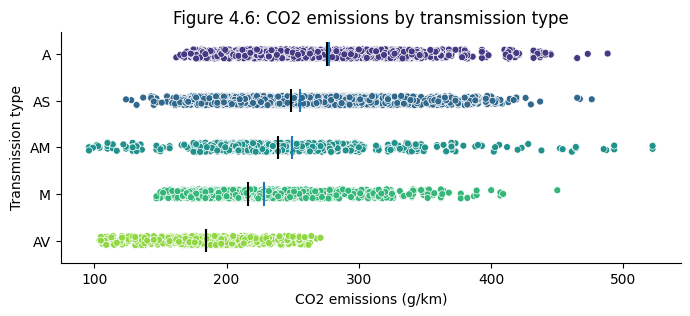

In [31]:
plot_emissions_by_var("TransmissionType", figheight = 3)
plt.title("Figure 4.6: CO2 emissions by transmission type")
plt.ylabel("Transmission type");

Figures 4.1 to 4.6 indicate that larger CO2 emissions coincide with:
- larger vehicle types
- larger engines
- more cylinders
- more gears (although this isn't a consistent relationship)
- transmission type (automatic vehicles produce the most and continuously variable produce the least, with manual transmission in the middle).

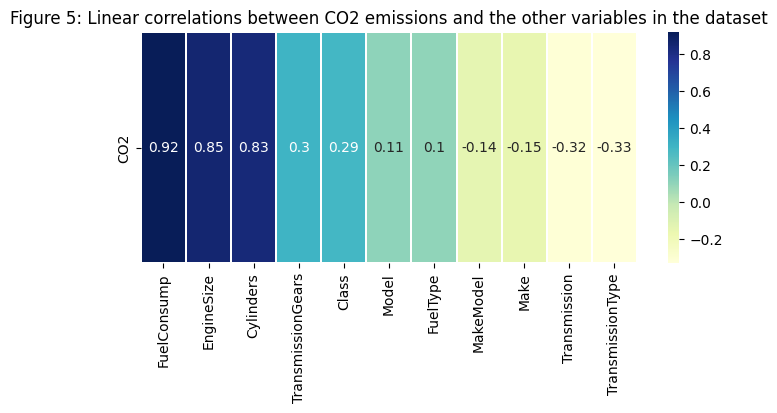

In [149]:
corr_data = cars.drop(['TransmissionGearsCat', 'EngineSize2', 'EngineSizeCat', 'CylindersCat'], axis = 1)

for col in corr_data.columns:
    if corr_data[col].dtype == 'object':
        enc = OrdinalEncoder()
        corr_data[col+'_enc'] = enc.fit_transform(corr_data[col].to_numpy().reshape(-1, 1))
    else:
        pass

cols = [col for col in corr_data.columns if corr_data[col].dtype != 'object']
corr_data2 = corr_data[cols]

def strip_right(df, suffix = '_enc'):
    df.columns = df.columns.str.replace(suffix, '')

strip_right(corr_data2)

corr_df = corr_data2.corr().iloc[3:4,:]
corr_df.sort_values(by = corr_df.index[0], axis = 1, ascending = False, inplace = True)
corr_df.drop('CO2', axis = 1, inplace = True)

fig, ax = plt.subplots(figsize = (8,3))
ax = sns.heatmap(corr_df, annot = True, linewidths = 0.3, cmap = "YlGnBu")
plt.title("Figure 5: Linear correlations between CO2 emissions and the other variables in the dataset");

The relationships we generally expected are all there. The categorical variables were ordinal (label) encoded, so in order make any definite conclusions, we'd have to go in and check the encoding order and/or force a more sensible category ordering.

### References

- https://www.nrcan.gc.ca/energy-efficiency/energuide-canada/energuide-vehicles/21010
- https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64#wb-auto-6

## Part 2 - Understanding the bicycle market
**Coding language: SQL Server**

### Background
The new team leader for the bicycle store chain has come from a different industry and needs assistance in understanding the bicycle market. In particular, they need to understand better the brands and categories sold at the chain.

### Data
The data made available for this project was in the form of a database consisting of three tables and contained 10 different variables as detailed below:

**products**
- "product_id" - Product identifier.
- "product_name" - The name of the bicycle.
- "brand_id" - You can look up the brand's name in the "brands" table.
- "category_id" - You can look up the category's name in the "categories" table.
- "model_year" - The model year of the bicycle.
- "list_price" - The price of the bicycle.
**brands**
- "brand_id" - Matches the identifier in the "products" table.
- "brand_name" - One of the nine brands the store sells.
**categories**
- "category_id" - Matches the identifier in the "products" table.
- "category_name" - One of the seven product categories in the store.

### Summary

### Detailed Findings

In [25]:
-- What is the most expensive bike sold?
SELECT TOP 6 *
FROM products p
LEFT JOIN brands b
	ON p.brand_id = b.brand_id
LEFT JOIN categories c
	ON p.category_id = c.category_id
LEFT JOIN stocks s
	ON p.product_id = s.product_id
ORDER BY list_price DESC;

,product_id,product_name,brand_id,category_id,model_year,list_price,brand_name,category_name,store_id,quantity
0,"[155, 155]",Trek Domane SLR 9 Disc - 2018,"[9, 9]","[7, 7]",2018,11999.99,Trek,Road Bikes,1,8
1,"[155, 155]",Trek Domane SLR 9 Disc - 2018,"[9, 9]","[7, 7]",2018,11999.99,Trek,Road Bikes,2,21
2,"[155, 155]",Trek Domane SLR 9 Disc - 2018,"[9, 9]","[7, 7]",2018,11999.99,Trek,Road Bikes,3,25
3,"[149, 149]",Trek Domane SLR 8 Disc - 2018,"[9, 9]","[7, 7]",2018,7499.99,Trek,Road Bikes,1,1
4,"[149, 149]",Trek Domane SLR 8 Disc - 2018,"[9, 9]","[7, 7]",2018,7499.99,Trek,Road Bikes,2,22
5,"[149, 149]",Trek Domane SLR 8 Disc - 2018,"[9, 9]","[7, 7]",2018,7499.99,Trek,Road Bikes,3,1


In [24]:
-- What is the cheapest bike sold?
SELECT TOP 6 *
FROM products p
LEFT JOIN brands b
	ON p.brand_id = b.brand_id
LEFT JOIN categories c
	ON p.category_id = c.category_id
LEFT JOIN stocks s
	ON p.product_id = s.product_id
ORDER BY list_price;

,product_id,product_name,brand_id,category_id,model_year,list_price,brand_name,category_name,store_id,quantity
0,"[263, 263]",Strider Classic 12 Balance Bike - 2018,"[6, 6]","[1, 1]",2018,89.99,Strider,Children Bicycles,1,21
1,"[263, 263]",Strider Classic 12 Balance Bike - 2018,"[6, 6]","[1, 1]",2018,89.99,Strider,Children Bicycles,2,4
2,"[263, 263]",Strider Classic 12 Balance Bike - 2018,"[6, 6]","[1, 1]",2018,89.99,Strider,Children Bicycles,3,21
3,"[84, 84]",Sun Bicycles Lil Kitt'n - 2017,"[7, 7]","[1, 1]",2017,109.99,Sun Bicycles,Children Bicycles,1,11
4,"[84, 84]",Sun Bicycles Lil Kitt'n - 2017,"[7, 7]","[1, 1]",2017,109.99,Sun Bicycles,Children Bicycles,2,22
5,"[84, 84]",Sun Bicycles Lil Kitt'n - 2017,"[7, 7]","[1, 1]",2017,109.99,Sun Bicycles,Children Bicycles,3,15


The most expensive item sold is a 2018 Trek Domane SLR 9 Disc. Its listing price is $\$11,999.99$. The next most expensive item is listed at $\$7,499.99$ - $\$4,500$ less - and is a 2018 Trek Domane SLR 8 Disc. Both of these are road bikes. In fact, the top 11 most expensive items are road bikes.

Furthermore, all three stores in the database have this bike in stock, although store 1 only has eight, whereas stores 2 and 3 both have over 20. With respect to the next most expensive bike, stores 1 and 3 only have one remaining, but store 2 has plenty (22).

In contrast, the cheapest bike sold is a 2018 Strider Classic 12 Balance Bike and it's listed for $\$89.99$. The second cheapest is also a children's bike and it's listed for $\$109.99$. And it's a similar story, the 60 cheapest bikes sold are all children's bikes. Store 2 is low in stock of this bike (4 remaining), but stores 1 and 3 have plenty.

In [42]:
-- How many different products of each category does your company sell?
SELECT category_name,
	   COUNT(DISTINCT product_name) num_products,
       COUNT(DISTINCT brand_id) num_brands,
	   ROUND(AVG(list_price), 2) avg_list_price,
       ROUND(MAX(list_price) - MIN(list_price), 2) list_price_range,
       ROUND(MIN(list_price), 2) min_list_price,
	   ROUND(MAX(list_price), 2) max_list_price,
FROM products p
LEFT JOIN categories c
	ON p.category_id = c.category_id
GROUP BY category_name;

,category_name,num_products,num_brands,avg_list_price,list_price_range,min_list_price,max_list_price
0,Children Bicycles,59,5,287.79,400.00,89.99,489.99
1,Comfort Bicycles,30,2,682.12,2183.00,416.99,2599.99
2,Cruisers Bicycles,78,3,730.41,2749.00,250.99,2999.99
3,Cyclocross Bicycles,10,2,2542.79,2450.99,1549.00,3999.99
4,Electric Bikes,24,3,3281.66,3440.00,1559.99,4999.99
5,Mountain Bikes,60,6,1649.76,4920.00,379.99,5299.99
6,Road Bikes,60,2,3175.36,11250.00,749.99,11999.99


There are seven different bike categories sold by the company: children, comfort, cruisers, cyclocross, electric, mountain and road. There are 78 different types of cruiser bikes sold, whereas only 10 different types of cruiser bikes.

It is interesting to observe that whilst the most expensive products are road bikes, the average list price of the electric bike category is actually slightly higher ($\$3,281.66$ compared to $\$3,175.36$). The cheapest category is (unsurprisingly) children's bikes, with the average list price of comfort and cruisers not that much higher.

However, it is important to note that list prices within each category can range dramatically. This is particularly the case for road bikes and mountain bikes to a lesser extent, where the prices range from $\$749.99$ to $\$11,999.99$ (from $\$379.99$ to $\$5,299.99$ for mountain bikes).

In [7]:
-- What are the top three brands with the highest average list price?
SELECT TOP 3 brand_name,
	   COUNT(DISTINCT product_name) num_products,
       ROUND(AVG(list_price), 2) avg_list_price
FROM brands b
LEFT JOIN products p
	ON b.brand_id = p.brand_id
GROUP BY brand_name
ORDER BY avg_list_price DESC;

,brand_name,num_products,avg_list_price
0,Trek,135,2500.06
1,Heller,3,2173.00
2,Surly,23,1331.75


The top three brands sold by average list price are Trek, Heller and Surly (in that order).

In [13]:
-- How many different brands are sold?
-- SELECT * FROM brands;
-- How many different products of each brand are sold?
SELECT brand_name,
	   COUNT(DISTINCT product_id) num_product_ids,
       COUNT(DISTINCT product_name) num_products
FROM brands b
LEFT JOIN products p
	ON b.brand_id = p.brand_id
GROUP BY brand_name;

,brand_name,num_product_ids,num_products
0,Electra,118,92
1,Haro,10,10
2,Heller,3,3
3,Pure Cycles,3,3
4,Ritchey,1,1
5,Strider,3,3
6,Sun Bicycles,23,21
7,Surly,25,23
8,Trek,135,135


Nine different brands are sold:
- Electra
- Haro
- Heller
- Pure Cycles
- Ritchey
- Strider
- Sun Bicycles
- Surly
- Trek

The company sells the most different types of Trek bikes, followed by Electra bikes - although it appears as though there could be a couple of different bikes with the same name but different product ids by the difference in numbers. In contrast, the company only sells a single type of Ritchey bike and a handful of Heller, Pure Cycles and Strider bikes.